<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-titanic/blob/main/titanic_transcription2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###캐글 타이타닉 필사

[필사에 참고한 링크](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

In [114]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [115]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [116]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [117]:
#오류 무시
import warnings
warnings.filterwarnings('ignore')

In [118]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/test.csv')
combine = [train_df, test_df]

In [119]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Categorical feature
- Survived, Sex and Embarked
- Ordinal : Pclass

Numerical feature
- Continous : Age, Fare
- Discrete : SibSp, Parch

In [120]:
#preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Mix feature
- Ticket, Cabin

Feature of contain error 
- Name(이름 특성에는 오타가 존재) 

In [121]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Feature of contain blank, null or empty value
- Cabin > Age > Embarked (train_df)
- Cabin > Age > Fare(Fare have 1 nan value)

In [122]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [123]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

What is data type?
- train_df have seven integer or float
- test_df have six integer or float
- both five object type

In [124]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [125]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hoyt, Mr. William Fisher",male,1601,B96 B98,S
freq,1,577,7,4,644


In [127]:
train_df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [128]:
train_df[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [129]:
train_df[['SibSp','Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [130]:
train_df[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


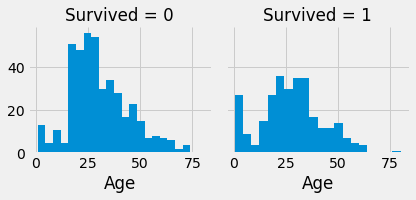

In [131]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

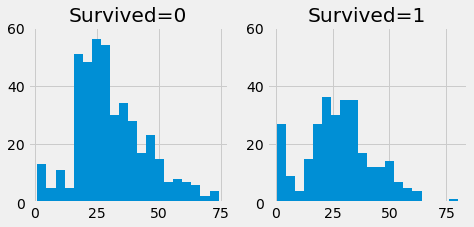

In [132]:
fig, axes = plt.subplots(1,2,figsize=(7,3))
y = list(range(0,80,20))
train_df[train_df['Survived']==0]['Age'].plot.hist(ax=axes[0],bins=20)
axes[0].set_title('Survived=0')
axes[0].set_yticks(y)
axes[0].set_ylabel('')
train_df[train_df['Survived']==1]['Age'].plot.hist(ax=axes[1],bins=20)
axes[1].set_title('Survived=1')
axes[1].set_yticks(y)
axes[1].set_ylabel('')
plt.show()

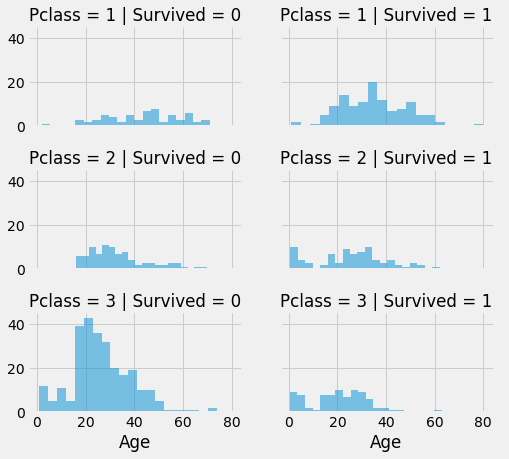

In [133]:
grid = sns.FacetGrid(data=train_df, row='Pclass',col='Survived',aspect=1.6,size=2.2)
grid.map(plt.hist, 'Age',alpha=0.5, bins=20)
grid.add_legend()

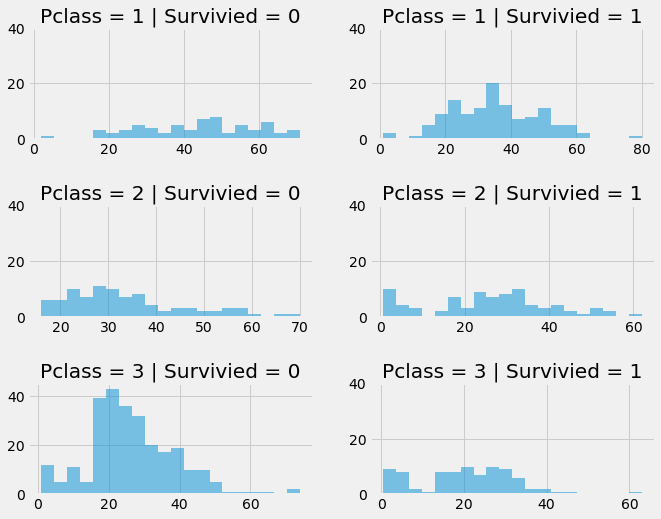

In [134]:
fig, axes = plt.subplots(3,2,figsize=(10,8))
y = list(range(0,60,20))
train_df.loc[(train_df['Survived']==0) & (train_df['Pclass']==1),'Age'].plot.hist(ax=axes[0,0],bins=20,alpha=0.5)
axes[0,0].set_title('Pclass = 1 | Survivied = 0')
axes[0,0].set_yticks(y)
axes[0,0].set_ylabel('')
train_df.loc[(train_df['Survived']==1) & (train_df['Pclass']==1),'Age'].plot.hist(ax=axes[0,1],bins=20,alpha=0.5)
axes[0,1].set_title('Pclass = 1 | Survivied = 1')
axes[0,1].set_yticks(y)
axes[0,1].set_ylabel('')
train_df.loc[(train_df['Survived']==0) & (train_df['Pclass']==2),'Age'].plot.hist(ax=axes[1,0],bins=20,alpha=0.5)
axes[1,0].set_title('Pclass = 2 | Survivied = 0')
axes[1,0].set_yticks(y)
axes[1,0].set_ylabel('')
train_df.loc[(train_df['Survived']==1) & (train_df['Pclass']==2),'Age'].plot.hist(ax=axes[1,1],bins=20,alpha=0.5)
axes[1,1].set_title('Pclass = 2 | Survivied = 1')
axes[1,1].set_yticks(y)
axes[1,1].set_ylabel('')
train_df.loc[(train_df['Survived']==0) & (train_df['Pclass']==3),'Age'].plot.hist(ax=axes[2,0],bins=20,alpha=0.5)
axes[2,0].set_title('Pclass = 3 | Survivied = 0')
axes[2,0].set_yticks(y)
axes[2,0].set_ylabel('')
train_df.loc[(train_df['Survived']==1) & (train_df['Pclass']==3),'Age'].plot.hist(ax=axes[2,1],bins=20,alpha=0.5)
axes[2,1].set_title('Pclass = 3 | Survivied = 1')
axes[2,1].set_yticks(y)
axes[2,1].set_ylabel('')
plt.subplots_adjust(hspace=0.6,wspace=0.2)
plt.show()

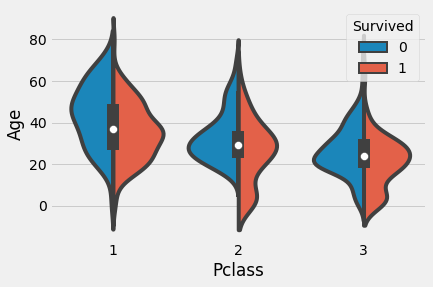

In [135]:
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=train_df, split=True)
plt.show()

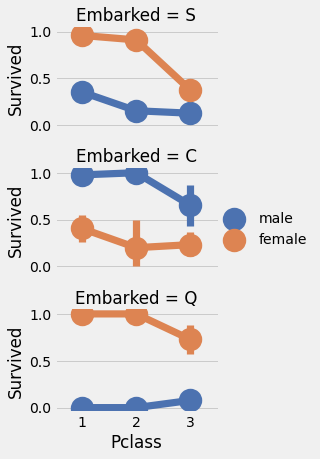

In [136]:
grid = sns.FacetGrid(data=train_df, row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot , 'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

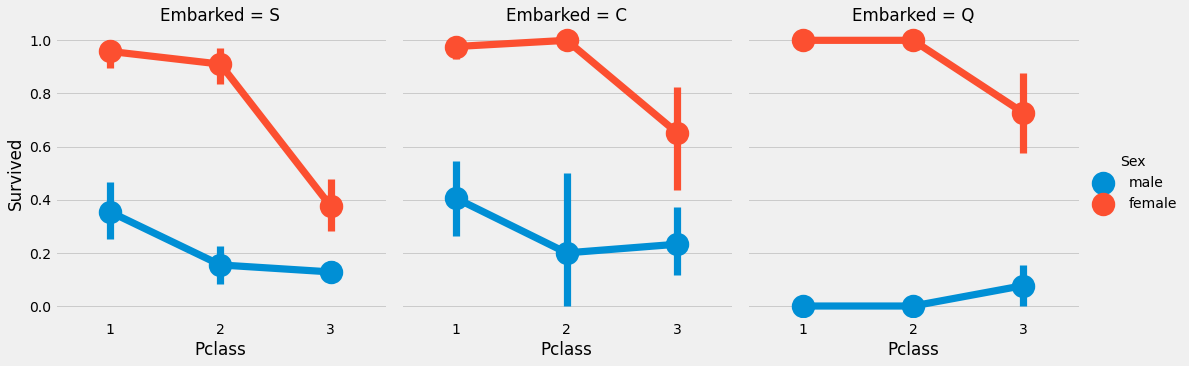

In [137]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_df)
plt.show()

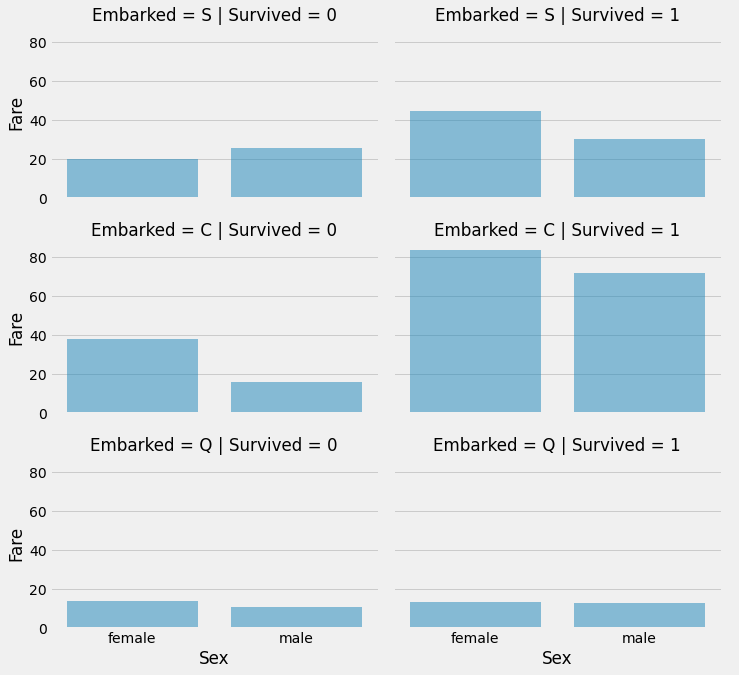

In [138]:
grid = sns.FacetGrid(train_df, row='Embarked',col='Survived',size=3.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',ci=False,alpha=0.5)
grid.add_legend()

Drop 'Cabin' and 'Ticket' feature

In [139]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)
combine = [train_df , test_df]
print("Atter", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
Atter (891, 10) (418, 9) (891, 10) (418, 9)


In [140]:
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [141]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
  dataset['Title'] = dataset['Title'].replace('Ms','Miss')
  dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [142]:
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,'Rare':5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

In [143]:
train_df = train_df.drop(["Name",'PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine = [train_df, test_df]


In [144]:
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2


Completing a numerical continuous feature

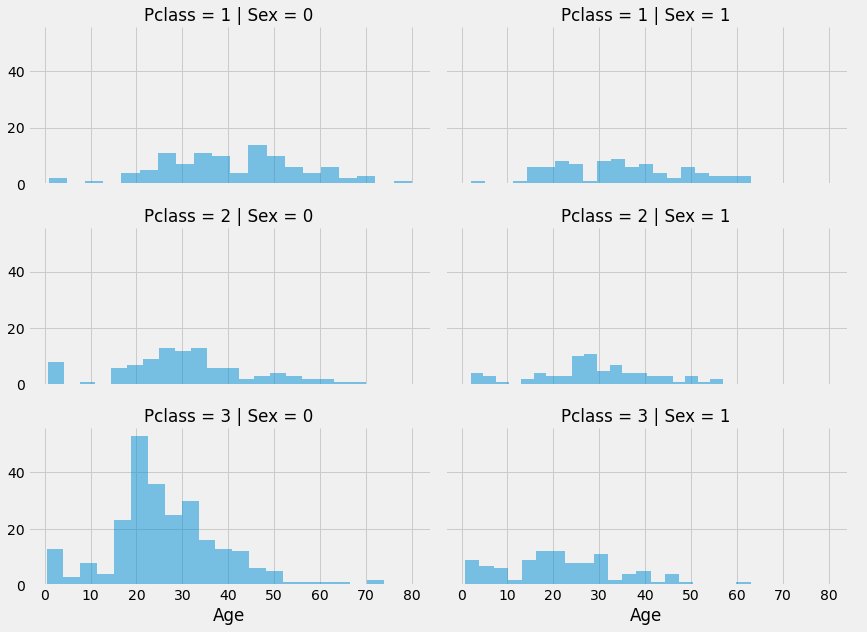

In [145]:
grid = sns.FacetGrid(data=train_df, row='Pclass', col='Sex', size=3, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [146]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [147]:
for dataset in combine:
  for i in range(0,2): #Sex
    for j in range(0,3): #Pclass
      guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

      age_guess = guess_df.median()
      
      guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5

  for i in range(0,2):
    for j in range(0,3):
      dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex']== i) & (dataset['Pclass']== j+1), 'Age'] = guess_ages[i,j]

  dataset['Age'] = dataset['Age'].astype(int)
  
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [148]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)

train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by="AgeBand", ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [149]:
for dataset in combine:
  dataset.loc[dataset['Age'] <= 16.0, "Age"] = 0 # 0~16
  dataset.loc[(16 < dataset["Age"]) & (dataset['Age'] <= 32), "Age"] = 1 #17~32
  dataset.loc[(32 < dataset["Age"]) & (dataset['Age'] <= 48), "Age"] = 2 #33~48
  dataset.loc[(48 < dataset["Age"]) & (dataset['Age'] <= 64), "Age"] = 3 #49~64
  dataset.loc[64 < dataset['Age'], "Age"] = 4 #65~ 
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [150]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [151]:
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', "Survived"]].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [152]:
for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize'] == 1, "IsAlone"] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone']).mean().sort_values(by='Survived', ascending=False)

,Survived
IsAlone,
0,0.505650
1,0.303538


In [153]:
train_df = train_df.drop(['SibSp', "Parch",'FamilySize'], axis=1)
test_df = test_df.drop(['SibSp', "Parch",'FamilySize'], axis=1)

combine = [train_df , test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [154]:
for dataset in combine:
  dataset['Age*Pclass'] = dataset['Age']*dataset['Pclass']
train_df.loc[:, ['Age*Pclass','Age','Pclass']].head()

,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [155]:
#train_df['Embarked'].value_counts() ## top 1 = 'S'

freq_port = train_df['Embarked'].mode()[0]
freq_port

'S'

In [156]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [157]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].map({'S' : 0, "C" : 1, "Q": 2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [158]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].dropna().median())
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Pclass     0
dtype: int64

In [159]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)

train_df[['FareBand', 'Survived']].groupby(['FareBand']).mean().sort_values(by='FareBand', ascending=True)

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [160]:
for dataset in combine:
  dataset.loc[(dataset['Fare'] <= 7.91), 'Fare'] = 0
  dataset.loc[(7.91 < dataset['Fare']) & (dataset['Fare'] <= 14.454), "Fare"] = 1
  dataset.loc[(14.454 < dataset['Fare']) & (dataset['Fare'] <= 31.0), "Fare"] = 2
  dataset.loc[(31.0 < dataset['Fare']), "Fare"] = 3
  dataset['Fare'] = dataset['Fare'].astype(int)



In [161]:
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [162]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


Model, predict and solve
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [163]:
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'], axis=1)

X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [164]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred= logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) *100 , 2)
acc_log

81.37

In [165]:
coef_df = pd.DataFrame(train_df.columns.delete(0))
coef_df.columns = ['Feature']
coef_df['Correlation'] = pd.Series(logreg.coef_[0])

coef_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*Pclass,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


In [166]:
#Support Vector Machines

svc= SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

82.83

In [167]:
#KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)*100, 2)
acc_knn

84.06

In [168]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100 ,2)
acc_gaussian

76.88

In [169]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train)*100, 2)
acc_perceptron

79.35

In [170]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc= round(linear_svc.score(X_train, y_train)*100, 2)
acc_linear_svc

79.46

In [171]:
#Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd= round(sgd.score(X_train, y_train)*100, 2)
acc_sgd

79.91

In [172]:
#Deicision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree= round(decision_tree.score(X_train, y_train)*100, 2)
acc_decision_tree

86.64

In [173]:
#Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest= round(random_forest.score(X_train, y_train)*100, 2)
acc_random_forest

86.64

In [174]:
models = pd.DataFrame(
    {"Models":[
               'Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'
    ],
     "Score" : [
                acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree
     ]}
)

models.sort_values(by='Score', ascending=False)

,Models,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,82.83
2,Logistic Regression,81.37
6,Stochastic Gradient Decent,79.91
7,Linear SVC,79.46
5,Perceptron,79.35
4,Naive Bayes,76.88


In [175]:
submit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/gender_submission.csv")
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [176]:
submit['Survived'] = y_pred
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [177]:
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/titanic_transcription2_submit.csv', index=False)

In [178]:
result  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/titanic_transcription2_submit.csv")
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [179]:
train_df.to_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/titanic_transcription2_train_df.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/titanic_transcription2_test_df.csv", index=False)

In [180]:
result = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/titanic_transcription2_train_df.csv")
result.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
